## Seaborn for Data Visualization 
### Based on a tutorial by Shahidhya Ramachandran
* https://seaborn.pydata.org/tutorial.html
## Check out matplotlib plots 
* Method for saving plots to disk (especially useful for including them in your reports:
* https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.savefig.html

## Import Packages: Seaborn, Pandas, Matplotlib
* iPython magic coe ```%matplotlib inline``` allows for inline display of plots 
* normally you have to do plt.show() to display your plots.

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load the dataset: low_birth_rate_full.csv
* After loading, explore the data, make sure everything loaded properly
* Relabel headers: overwrite them first thing after reading the data. 

### Explore data frames to check headers and data types
* ```low```: indicator of birth weight less than 2.5kg
* ```age```: mother's age in years
* ```lwt```: mother's weight in pounds at last menstrual period
* ```race```: mothers race ("white", "black", "other")
* ```smoke```: smoking status during pregnancy
* ```ht```: history of hypertension
* ```ui```: presence of uterine irritability
* ```ftv```: number of physician visits during the first trimester
* ```ptl```: number of previous premature labours
* ```bwt```: birth weight in grams

In [3]:
df = pd.read_csv("~/low_birth_rate_full.csv")
df.columns = ["ID","LOW","AGE","LWT","RACE","SMOKE","PTL","HT","UI","FTV","BWT"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
ID       189 non-null int64
LOW      189 non-null int64
AGE      189 non-null int64
LWT      189 non-null int64
RACE     189 non-null int64
SMOKE    189 non-null int64
PTL      189 non-null int64
HT       189 non-null int64
UI       189 non-null int64
FTV      189 non-null int64
BWT      189 non-null int64
dtypes: int64(11)
memory usage: 16.3 KB


## First plot: scatterplot with linear correlation
1. Compare birth weight and age. 

* Older mothers have a harder time giving birth, so maybe there's a relationship there. 
* Pass BWT as Y variable and AGE as X variable to seaborns ```lmplot``` method (linear model plot)
* It plot the points, axes, and regression line, and also plots an error field. Super handy!

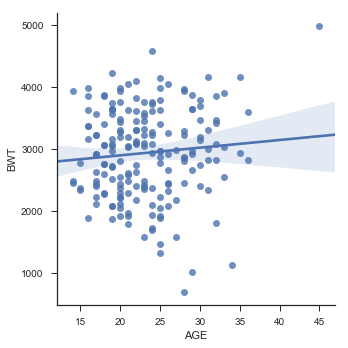

In [4]:
sns.set(style="ticks")
sns.lmplot(y='BWT',x='AGE',data=df)

### Check how weight of mother effects child, controlling for race. 
* No real hypothes, just to show you how we can do this.
* Code for race: 1=white, 2=black, 3=other
* Use command below to save this plot

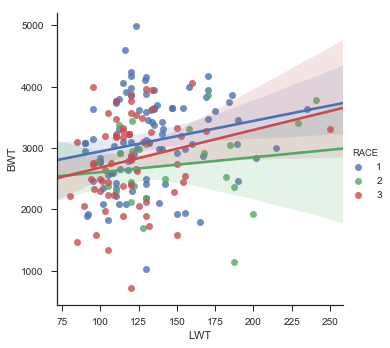

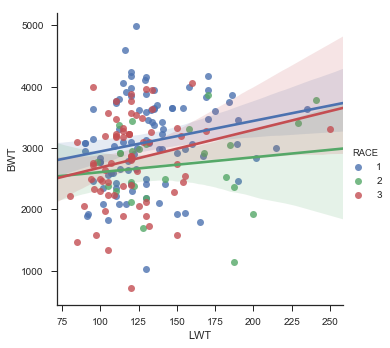

In [5]:
sns.lmplot(y="BWT",x="LWT",hue="RACE",data=df) 

p = sns.lmplot(y="BWT",x="LWT",hue="RACE",data=df) 
p.savefig("fancy-regression-chart.png")

## Second plot: Violin Plots
* Violin plots are an excellent way to explore data. 
* Similar to visual t-tests, evaluate plots to guage difference (instead of p-value and R-squared) 
* Does smoking status of mother impact birthweight of baby?

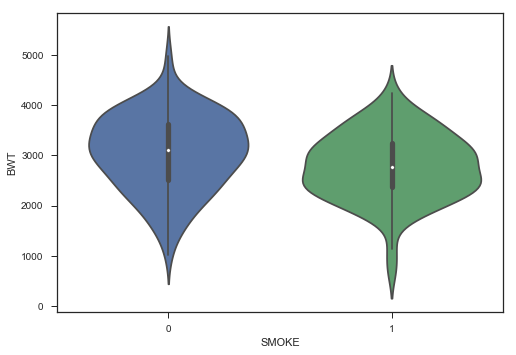

In [6]:
sns.violinplot(y="BWT",x="SMOKE",data=df)

In [ ]:
### Plot 'SMOKE' status, infant 'BWT', and hyptertension 'HT'
* Qualify difference between smoking and non-smoking mothers, with hypertension 
* What happens when we add hypertension into the mix?

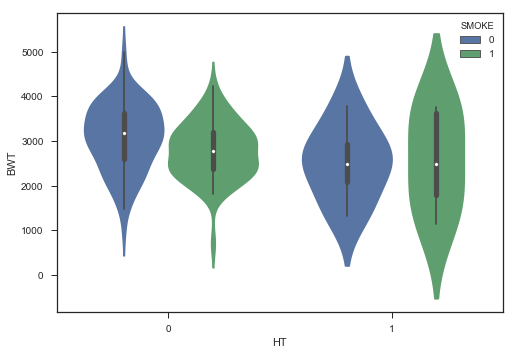

In [7]:
sns.violinplot(y="BWT",x="HT",hue="SMOKE",data=df)

## Third Plot: Factorplot
* Compare interaction of SMOKE, BWT, HT using bar charts.

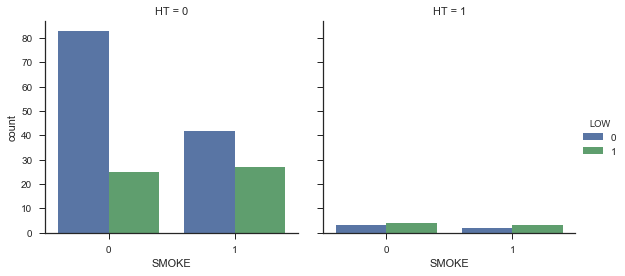

In [8]:
sns.factorplot(x="SMOKE",hue="LOW",col="HT",kind="count",data=df)

## Fourth plot: Correlation Heat Map
* Import numberical python package NumPy

### Analyze correlation between all pairs of variables in heatmap
* Generate a mask for the upper triangle
* Set up matplotlib figure
* Generate a custom diverging colormap
* Draw heatmap with the mask and correct aspect ratio

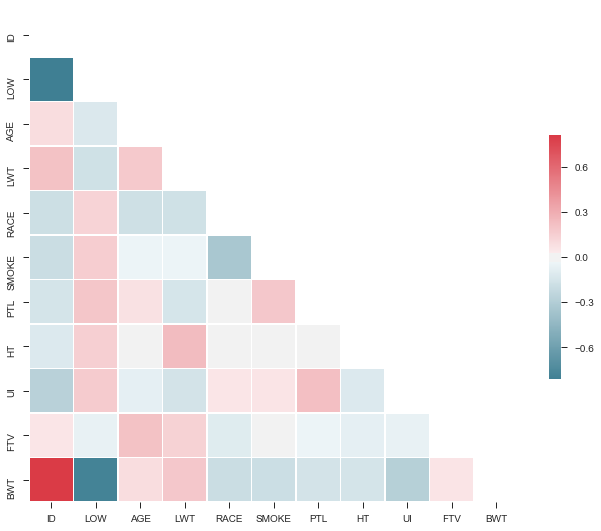

In [11]:
import numpy as np
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Fifth Plot: Pairplots
* To understand the distribution of each variable and
* Also plot it against all other variables to understand their relationship. 
* Graph can be visualized for different values of a chosen 'hue' variable

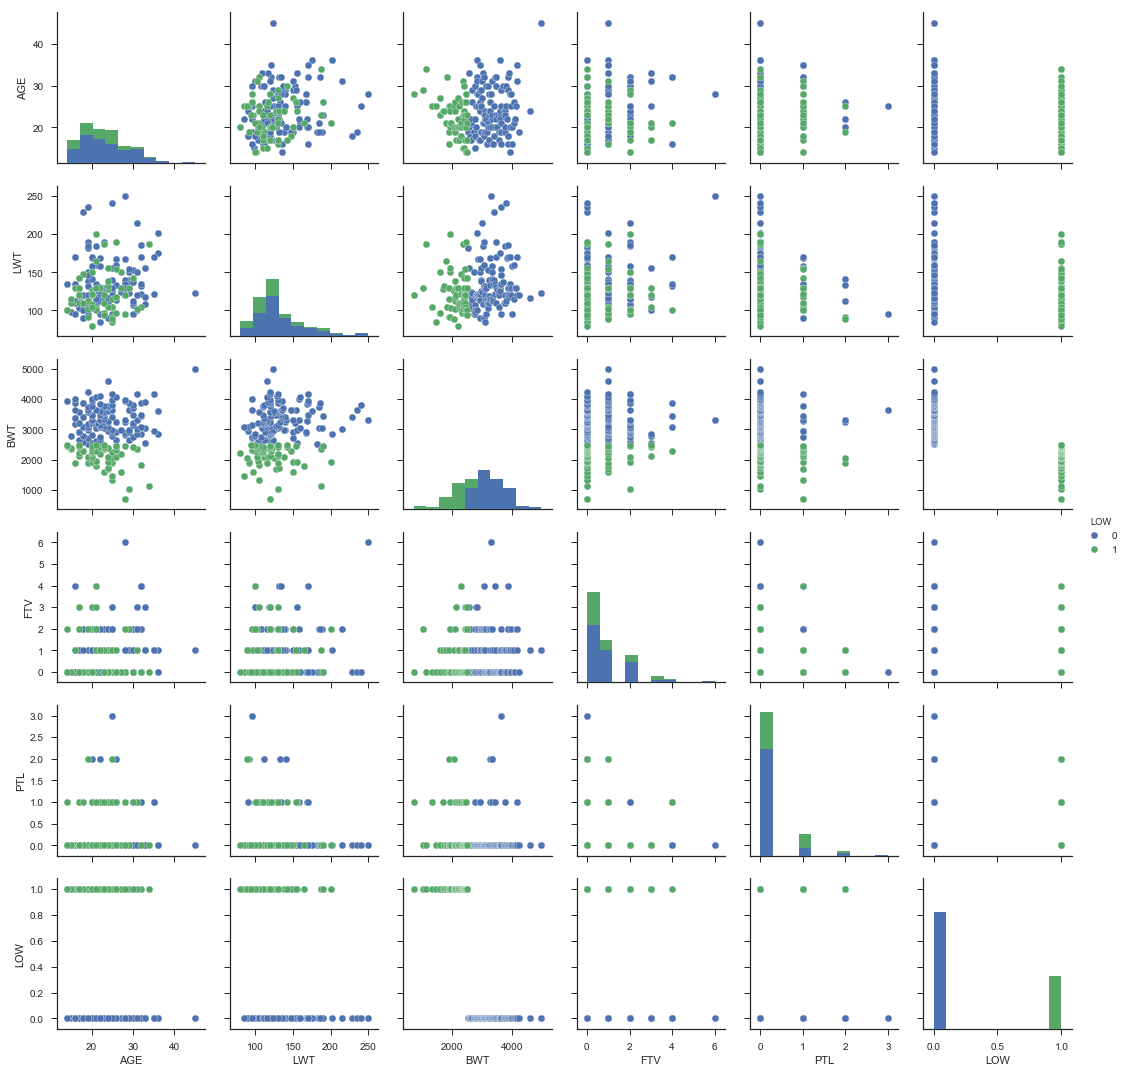

In [12]:
df1 = df[['AGE','LWT','BWT','FTV','PTL','LOW']]
sns.pairplot(df1, hue = 'LOW',size=2.5);

## Sixth Plot: Histogram with Kernel Density Estimate
* To understand the distribbution of a single variable
* Plot the histogram and overlay the distribution of the variable. 
* Helps identify skew in the data.

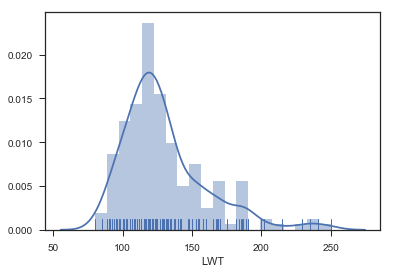

In [13]:
sns.distplot(df['LWT'], bins = 20, rug = True)